In [62]:
!pip install kaggle

In [63]:
# configurer le chemin du fichier kagglejson
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [68]:
# API pour importer le dataset depuis kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 66% 107M/163M [00:00<00:00, 1.05GB/s]
100% 163M/163M [00:00<00:00, 1.01GB/s]


In [69]:
# extraction du fichier zip
import zipfile

with zipfile.ZipFile("/content/face-mask-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/face-mask-dataset")

In [2]:
# importation de modules, librairies
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Chemin du dossier des images avec masque
dossier_avec_masque = "/content/face-mask-dataset/data/with_mask"

In [4]:
# Liste des fichiers dans le dossier avec masque
fichiers_avec_masque = os.listdir(dossier_avec_masque)

print("Nombre d'images avec masque :", len(fichiers_avec_masque))
print("Quelques fichiers avec masque :", fichiers_avec_masque[:5])

Nombre d'images avec masque : 3725
Quelques fichiers avec masque : ['with_mask_2201.jpg', 'with_mask_2189.jpg', 'with_mask_2838.jpg', 'with_mask_3470.jpg', 'with_mask_2913.jpg']


In [5]:
# Chemin du dossier des images sans masque
dossier_sans_masque = "/content/face-mask-dataset/data/without_mask"

In [6]:
# Liste des fichiers dans le dossier sans masque
fichiers_sans_masque = os.listdir(dossier_sans_masque)

print("Nombre d'images sans masque :", len(fichiers_sans_masque))
print("Quelques fichiers sans masque :", fichiers_sans_masque[:5])

Nombre d'images sans masque : 3828
Quelques fichiers sans masque : ['without_mask_2415.jpg', 'without_mask_223.jpg', 'without_mask_1392.jpg', 'without_mask_2702.jpg', 'without_mask_2971.jpg']


In [7]:
# je vais creer des etiquettes pour faire la difference entre les images avec ou sans masque
# Convention de labels:
#    sans masque  -> 0
#    avec masque  -> 1

etiquettes_avec_masque = [1] * len(fichiers_avec_masque)
etiquettes_sans_masque = [0] * len(fichiers_sans_masque)

etiquettes = etiquettes_avec_masque + etiquettes_sans_masque

print("Taille de la liste d'étiquettes :", len(etiquettes))
print("5 premieres étiquettes :", etiquettes[:5])
print("5 dernieres étiquettes :", etiquettes[-5:])


Taille de la liste d'étiquettes : 7553
5 premieres étiquettes : [1, 1, 1, 1, 1]
5 dernieres étiquettes : [0, 0, 0, 0, 0]


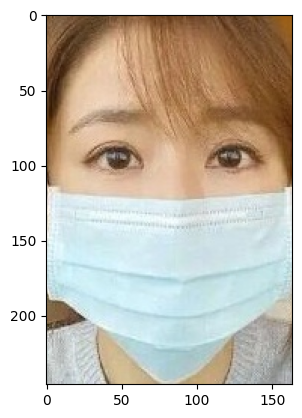

In [8]:
# Pour afficher une image avec masque
img = mpimg.imread('/content/face-mask-dataset/data/with_mask/with_mask_523.jpg')
imgplot = plt.imshow(img)
plt.show()

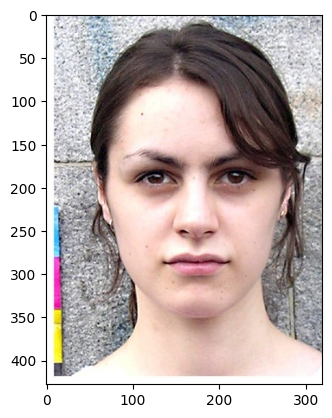

In [9]:
# Pour afficher une image sans masque
img = mpimg.imread('/content/face-mask-dataset/data/without_mask/without_mask_719.jpg')
imgplot = plt.imshow(img)
plt.show()

In [11]:
# Liste qui va contenir toutes les images sous forme de tableaux numpy
images = []

In [12]:
# Traitement des images avec masque
for nom_fichier in fichiers_avec_masque:
    chemin_image = os.path.join(dossier_avec_masque, nom_fichier)

    image = Image.open(chemin_image)      # ouvrir l'image
    image = image.resize((128, 128))      # redimensionner à 128x128
    image = image.convert("RGB")          # s'assurer qu'elle est en RGB
    tableau_image = np.array(image)       # convertir en tableau numpy

    images.append(tableau_image)          # ajouter à la liste

print("Nombre d'images dans 'images' après avec masque :", len(images))


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Nombre d'images dans 'images' après avec masque : 3725


In [13]:
# Traitement des images sans masque
for nom_fichier in fichiers_sans_masque:
    chemin_image = os.path.join(dossier_sans_masque, nom_fichier)

    image = Image.open(chemin_image)
    image = image.resize((128, 128))
    image = image.convert("RGB")
    tableau_image = np.array(image)

    images.append(tableau_image)

print("Nombre total d'images dans 'images' :", len(images))


Nombre total d'images dans 'images' : 7553


In [14]:
type(images) # Type de 'images'

list

array([[[ 79,  67,  55],
        [ 79,  67,  55],
        [ 81,  69,  57],
        ...,
        [181, 183, 177],
        [175, 176, 171],
        [171, 172, 167]],

       [[ 80,  68,  56],
        [ 80,  68,  56],
        [ 83,  71,  59],
        ...,
        [181, 183, 177],
        [175, 176, 171],
        [171, 172, 167]],

       [[ 82,  70,  58],
        [ 83,  71,  59],
        [ 86,  74,  62],
        ...,
        [182, 183, 177],
        [176, 177, 171],
        [172, 173, 168]],

       ...,

       [[ 78,  60,  40],
        [ 86,  68,  48],
        [ 99,  81,  61],
        ...,
        [157, 157, 157],
        [156, 156, 156],
        [156, 156, 156]],

       [[ 83,  65,  43],
        [ 89,  71,  50],
        [102,  84,  62],
        ...,
        [156, 156, 156],
        [156, 155, 155],
        [156, 155, 155]],

       [[ 86,  68,  45],
        [ 91,  73,  51],
        [103,  85,  63],
        ...,
        [156, 156, 156],
        [156, 154, 155],
        [156, 154, 155]]], dtype=uint8)
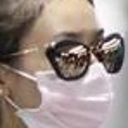

In [15]:
images[100]

In [16]:
# Conversion des listes Python en tableaux NumPy car TensorFlow
# et Keras n'acceptent pas les listes Python pour l'entrainement
X = np.array(images, dtype="float32") # images
Y = np.array(etiquettes) # etiquettes

print("Forme de X :", X.shape)
print("Forme de Y :", Y.shape)

Forme de X : (7553, 128, 128, 3)
Forme de Y : (7553,)


In [17]:
print(Y)

[1 1 1 ... 0 0 0]


In [18]:
# je fais maintenant le Train test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,       # 20% des données pour le test
    random_state=2,     # pour avoir toujours la même séparation
    stratify=Y           # garde le même ratio de classes dans train et test
)


In [19]:
print(X_test.shape, X_train.shape, Y_test)

(1511, 128, 128, 3) (6042, 128, 128, 3) [0 1 1 ... 0 0 1]


In [20]:
# Normalisation des pixels (division par 255)
# Les réseaux de neurones apprennent beaucoup mieux
# avec des valeurs petites et normalisées
X_train_normalise = X_train / 255.0
X_test_normalise = X_test / 255.0

In [24]:
import tensorflow as tf
from tensorflow import keras


In [25]:
# Nombre de classes(avec masque/sans masque)
nombre_de_classes = 2

# Création du modèle séquentiel (empilement de couches)
modele = keras.Sequential()

# couche d'entree
# Elle définit la forme des images qui entreront dans le réseau:
# 128 x 128 pixels et 3 canaux de couleur (R, G, B)
modele.add(keras.layers.Input(shape=(128, 128, 3)))

# 1ère couche de convolution + max pooling
modele.add(keras.layers.Conv2D(
    32,                       # nombre de filtres
    kernel_size=(3, 3),       # taille des filtres 3x3
    activation='relu',
    ))
modele.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# 2ème couche de convolution + max pooling
modele.add(keras.layers.Conv2D(
    64, # nombre de filtres plus profonds
    kernel_size=(3, 3),
    activation='relu'
))
modele.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Passage du format image au format vecteur
modele.add(keras.layers.Flatten())

# 1ère couche entièrement connectée
modele.add(keras.layers.Dense(128, activation='relu'))
modele.add(keras.layers.Dropout(0.5))  # evite le surapprentissage

# 2ème couche entièrement connectée
modele.add(keras.layers.Dense(64, activation='relu'))
modele.add(keras.layers.Dropout(0.5))

# Couche de sortie
modele.add(keras.layers.Dense(nombre_de_classes, activation='sigmoid'))


In [26]:
# compiler le modele
modele.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [27]:
# Entrainement du modele
historique = modele.fit(
    X_train_normalise,  # images d'entraînement
    Y_train,  # etiquettes d'entraînement
    epochs=5,  # nombre de passages sur toutes les données
    batch_size=32,  # taille des mini lots
    validation_split=0.1  # 10% du train pour la validation
)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 91s 526ms/step - accuracy: 0.7009 - loss: 0.6514 - val_accuracy: 0.8893 - val_loss: 0.2656
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 511ms/step - accuracy: 0.8880 - loss: 0.2826 - val_accuracy: 0.9025 - val_loss: 0.2292
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 528ms/step - accuracy: 0.9094 - loss: 0.2441 - val_accuracy: 0.9041 - val_loss: 0.2235
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 88s 520ms/step - accuracy: 0.9251 - loss: 0.1929 - val_accuracy: 0.9273 - val_loss: 0.2036
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 89s 521ms/step - accuracy: 0.9388 - loss: 0.1616 - val_accuracy: 0.9223 - val_loss: 0.2031


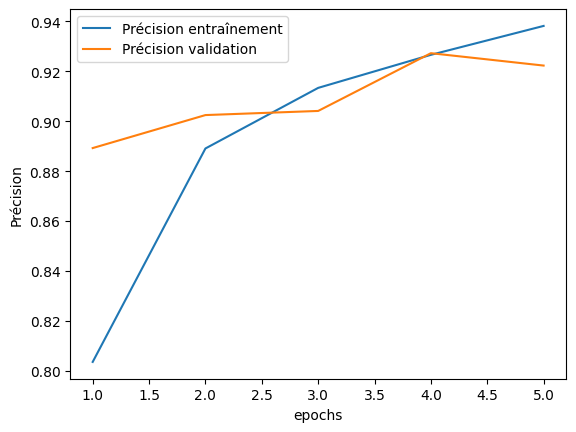

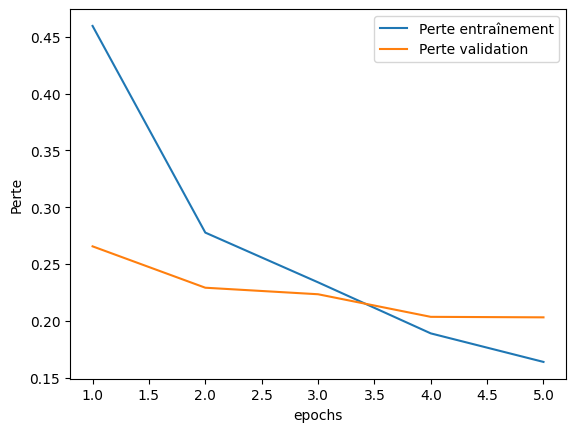

In [28]:
import matplotlib.pyplot as plt

# Récupération de l'historique
precision_entrainement = historique.history['accuracy']
precision_validation = historique.history['val_accuracy']
perte_entrainement = historique.history['loss']
perte_validation = historique.history['val_loss']

epochs = range(1, len(precision_entrainement) + 1)

# Courbe de précision
plt.figure()
plt.plot(epochs, precision_entrainement, label="Précision entraînement")
plt.plot(epochs, precision_validation, label="Précision validation")
plt.xlabel("epochs")
plt.ylabel("Précision")
plt.legend()
plt.show()

# Courbe de perte
plt.figure()
plt.plot(epochs, perte_entrainement, label="Perte entraînement")
plt.plot(epochs, perte_validation, label="Perte validation")
plt.xlabel("epochs")
plt.ylabel("Perte")
plt.legend()
plt.show()


In [29]:
# Evaluation sur les données de test
perte_test, precision_test = modele.evaluate(X_test_normalise, Y_test)
print("Perte sur le test      :", perte_test)
print("Précision sur le test :", precision_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9186 - loss: 0.2074
Perte sur le test      : 0.21535152196884155
Précision sur le test : 0.9146260619163513


Chemin de l'image: /content/face-mask-dataset/data/without_mask/without_mask_719.jpg


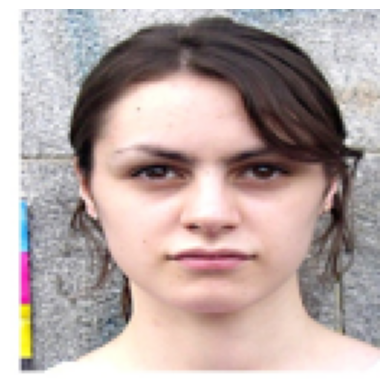

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Sortie brute du modèle : [[0.8747314 0.0034123]]
Classe prédite: 0
Probabilité sans masque : 0.8747314
Probabilité avec masque : 0.003412304
La personne sur l'image ne porte pas de masque


In [50]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

chemin_image = input("Chemin de l'image: ")

# Charger l'image comme pendant l'entraînement
image = Image.open(chemin_image)
image = image.resize((128, 128))
image = image.convert("RGB")

# Afficher l'image
plt.imshow(image)
plt.axis("off")
plt.show()

# Transformer en tableau + normaliser
image_array = np.array(image, dtype="float32") / 255.0

# Ajouter la dimension
image_pour_modele = np.expand_dims(image_array, axis=0)  # (1, 128, 128, 3)

# Prédiction
prediction = modele.predict(image_pour_modele)
print("Sortie brute du modèle :", prediction)

# Récupérer la classe prédite (0 ou 1)
classe_predite = np.argmax(prediction)
print("Classe prédite:", classe_predite)

proba_sans, proba_avec = prediction[0]
print("Probabilité sans masque :", proba_sans)
print("Probabilité avec masque :", proba_avec)

classe_predite = np.argmax(prediction[0])

if classe_predite == 1:
    print("La personne sur l'image porte un masque")
else:
    print("La personne sur l'image ne porte pas de masque")

Chemin de l'image: /content/face-mask-dataset/data/with_mask/with_mask_1003.jpg


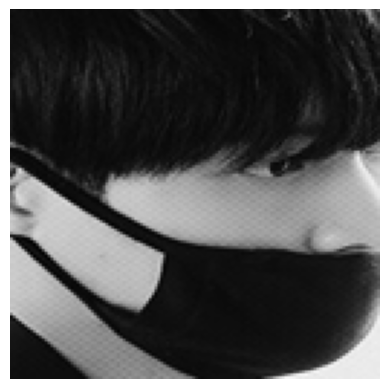

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sortie brute du modèle : [[0.00413807 0.69064605]]
Classe prédite: 1
Probabilité sans masque : 0.004138067
Probabilité avec masque : 0.69064605
La personne sur l'image porte un masque


In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

chemin_image = input("Chemin de l'image: ")

# Charger l'image comme pendant l'entraînement
image = Image.open(chemin_image)
image = image.resize((128, 128))
image = image.convert("RGB")

# Afficher l'image
plt.imshow(image)
plt.axis("off")
plt.show()

# Transformer en tableau + normaliser
image_array = np.array(image, dtype="float32") / 255.0

# Ajouter la dimension
image_pour_modele = np.expand_dims(image_array, axis=0)  # (1, 128, 128, 3)

# Prédiction
prediction = modele.predict(image_pour_modele)
print("Sortie brute du modèle :", prediction)

# Récupérer la classe prédite (0 ou 1)
classe_predite = np.argmax(prediction)
print("Classe prédite:", classe_predite)

proba_sans, proba_avec = prediction[0]
print("Probabilité sans masque :", proba_sans)
print("Probabilité avec masque :", proba_avec)

classe_predite = np.argmax(prediction[0])

if classe_predite == 1:
    print("La personne sur l'image porte un masque")
else:
    print("La personne sur l'image ne porte pas de masque")

Chemin de l'image: /content/face-mask-dataset/data/with_mask/with_mask_523.jpg


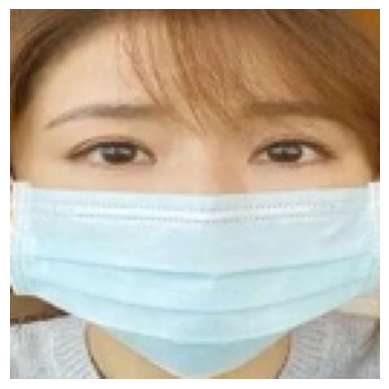

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Sortie brute du modèle : [[5.5710191e-04 6.6793025e-01]]
Classe prédite: 1
Probabilité sans masque : 0.0005571019
Probabilité avec masque : 0.66793025
La personne sur l'image porte un masque


In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

chemin_image = input("Chemin de l'image: ")

# Charger l'image comme pendant l'entraînement
image = Image.open(chemin_image)
image = image.resize((128, 128))
image = image.convert("RGB")

# Afficher l'image
plt.imshow(image)
plt.axis("off")
plt.show()

# Transformer en tableau + normaliser
image_array = np.array(image, dtype="float32") / 255.0

# Ajouter la dimension
image_pour_modele = np.expand_dims(image_array, axis=0)  # (1, 128, 128, 3)

# Prédiction
prediction = modele.predict(image_pour_modele)
print("Sortie brute du modèle :", prediction)

# Récupérer la classe prédite (0 ou 1)
classe_predite = np.argmax(prediction)
print("Classe prédite:", classe_predite)

proba_sans, proba_avec = prediction[0]
print("Probabilité sans masque :", proba_sans)
print("Probabilité avec masque :", proba_avec)

classe_predite = np.argmax(prediction[0])

if classe_predite == 1:
    print("La personne sur l'image porte un masque")
else:
    print("La personne sur l'image ne porte pas de masque")

Chemin de l'image: /content/face-mask-dataset/data/without_mask/without_mask_108.jpg


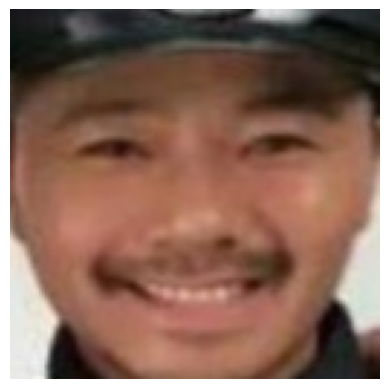

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Sortie brute du modèle : [[0.80336225 0.01134475]]
Classe prédite: 0
Proba SANS masque : 0.80336225
Proba AVEC masque : 0.011344753
La personne sur l'image ne porte pas de masque


In [52]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

chemin_image = input("Chemin de l'image: ")

# Charger l'image comme pendant l'entraînement
image = Image.open(chemin_image)
image = image.resize((128, 128))
image = image.convert("RGB")

# Afficher l'image
plt.imshow(image)
plt.axis("off")
plt.show()

# Transformer en tableau + normaliser
image_array = np.array(image, dtype="float32") / 255.0

# Ajouter la dimension
image_pour_modele = np.expand_dims(image_array, axis=0)  # (1, 128, 128, 3)

# Prédiction
prediction = modele.predict(image_pour_modele)
print("Sortie brute du modèle :", prediction)

# Récupérer la classe prédite (0 ou 1)
classe_predite = np.argmax(prediction)
print("Classe prédite:", classe_predite)

proba_sans, proba_avec = prediction[0]
print("Proba SANS masque :", proba_sans)
print("Proba AVEC masque :", proba_avec)

classe_predite = np.argmax(prediction[0])

if classe_predite == 1:
    print("La personne sur l'image porte un masque")
else:
    print("La personne sur l'image ne porte pas de masque")
